In [191]:
import pandas
import matplotlib
import matplotlib.pyplot as plt
import torch
from torch import nn
from torch.nn import functional as F
import torchvision
import torchvision.datasets as datasets
import numpy as np

# Preparing the MNIST Dataset

In [192]:
# mnist = pandas.read_csv("sample_data/mnist_train_small.csv")
# mnist.head()

In [193]:
mnist = mnist/255.  # normalising the pixels 

In [194]:
mnist = np.array(mnist)
mnist.shape

(19999, 785)

In [195]:
####  Data preparation for tensorflow part


import tensorflow as tf
import keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

(train_X, train_Y), (test_X, test_Y) = tf.keras.datasets.mnist.load_data()
train_X = train_X/255
train_y = train_Y/255


In [196]:
## Designing networks

encoder_input = keras.Input(shape=(28,28,1), name="img")
x = Flatten()(encoder_input)    # 784 X 1 (is the output)
encoder_output = Dense(25, activation = "relu")(x)

encoder = keras.Model(encoder_input, encoder_output, name='encoder')

decoder_input = Dense(25, activation="relu")(encoder_output)
y = Dense(784, activation="relu")(decoder_input)
decoder_output = keras.layers.Reshape((28,28,1))(y)

Autoencoders = keras.Model(encoder_input, decoder_output, name="Autoencoders")

opt = Adam(decay = 1e-6)

Autoencoders.compile(opt, loss="mse")
Autoencoders.summary()

Model: "Autoencoders"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_33 (Dense)             (None, 25)                19625     
_________________________________________________________________
dense_34 (Dense)             (None, 25)                650       
_________________________________________________________________
dense_35 (Dense)             (None, 784)               20384     
_________________________________________________________________
reshape_10 (Reshape)         (None, 28, 28, 1)         0         
Total params: 40,659
Trainable params: 40,659
Non-trainable params: 0
__________________________________________________

# Training

In [197]:
results = Autoencoders.fit(train_X, train_X, epochs=5, batch_size=32, validation_split=0.2)
results = Autoencoders.fit(train_X, train_X, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0343 - val_loss: 0.0275
Epoch 2/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0265 - val_loss: 0.0257
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0257 - val_loss: 0.0256
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0255 - val_loss: 0.0252
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0253 - val_loss: 0.0250
Epoch 1/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0250 - val_loss: 0.0247
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0248 - val_loss: 0.0246
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0247 - val_loss: 0.0246
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0246 - val_loss: 0.0244
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0245 - val_los

In [198]:
Autoencoders.save("Autoencoders.model")

INFO:tensorflow:Assets written to: Autoencoders.model/assets


In [199]:
loss = results.history['loss']
val_loss = results.history['val_loss']
r_epochs = range(5)

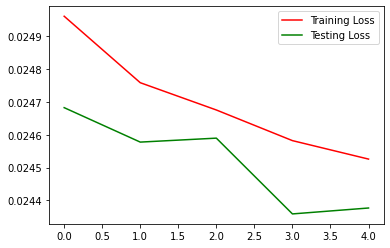

In [200]:

#Plot training and validation loss per epoch
plt.plot(r_epochs,loss,'r',label='Training Loss')
plt.plot(r_epochs,val_loss,'g',label='Testing Loss')   
plt.legend()
plt.show()

# Prediction part

In [201]:
predict = encoder.predict([test_X[0].reshape(-1, 28, 28, 1)])
print(predict[0].shape)
print(predict[0])

(25,)
[ 350.6354  1226.0968    93.2187   188.03447    0.       230.24702
  452.56903  558.5368   415.7613   351.9176   325.33105 1004.35724
  252.11133  140.1992     0.       193.08043  306.67444  242.5488
  323.61505  410.92822  762.30786  274.59253  390.763    638.35846
 1190.6299 ]


In [202]:
print(len(predict))
print(predict)

1
[[ 350.6354  1226.0968    93.2187   188.03447    0.       230.24702
   452.56903  558.5368   415.7613   351.9176   325.33105 1004.35724
   252.11133  140.1992     0.       193.08043  306.67444  242.5488
   323.61505  410.92822  762.30786  274.59253  390.763    638.35846
  1190.6299 ]]


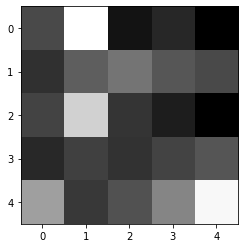

In [203]:
plt.imshow(predict[0].reshape((5, 5)), cmap="gray")

(28, 28)


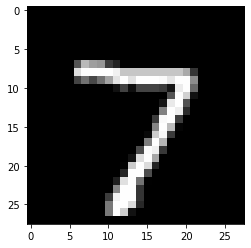

In [204]:
plt.imshow(test_X[0], cmap="gray")
print(test_X[0].shape)

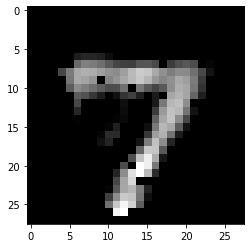

In [205]:
predict = Autoencoders.predict([test_X[0].reshape(-1,28,28,1)])
img = predict[0]
img = img.reshape(28,28)
plt.imshow(img, cmap="gray")

In [206]:
print(test_X[0].shape)

(28, 28)


In [207]:
import random
###  will put some random noises in the image..
def noise_injection(img, prob = 5):
  noisy = []
  for row in img:
    new_row = []
    for pix in row:
            if random.choice(range(100)) <= prob: 
                new_val = random.uniform(0, 1)
                new_row.append(new_val)
            else:
                new_row.append(pix)
    noisy.append(new_row)
  return np.array(noisy)

def remove_values(img, prob = 5):
  noisy = []
  for row in img:
    new_row = []
    for pix in row:
            if random.choice(range(100)) <= prob: 
                new_val = 0
                new_row.append(new_val)
            else:
                new_row.append(pix)
    noisy.append(new_row)
  return np.array(noisy)

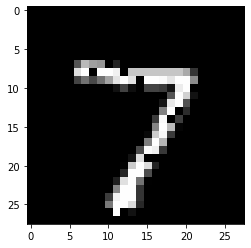

In [208]:
noise = noise_injection(test_X[0], 10)
plt.imshow(noise, cmap="gray")

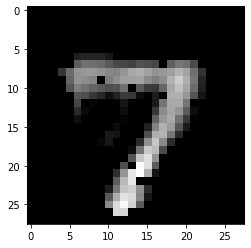

In [209]:
predict = Autoencoders.predict([noise.reshape(-1,28,28,1)])
img = predict[0]
img = img.reshape(28,28)
plt.imshow(img, cmap="gray")

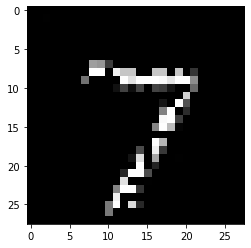

In [210]:
noise = noise_injection(test_X[0], 40)
plt.imshow(noise, cmap="gray")

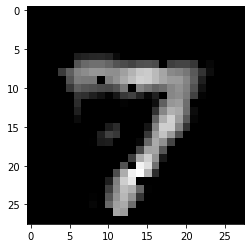

In [211]:
predict = Autoencoders.predict([noise.reshape(-1,28,28,1)])
img = predict[0]
img = img.reshape(28,28)
plt.imshow(img, cmap="gray")

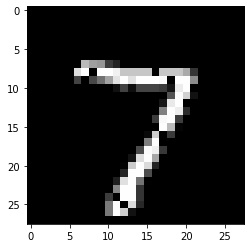

In [212]:
removed = remove_values(test_X[0], 10)
plt.imshow(removed, cmap="gray")

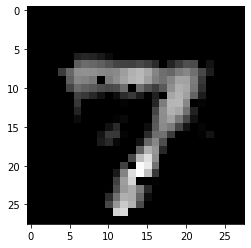

In [213]:
predict = Autoencoders.predict([removed.reshape(-1,28,28,1)])
img = predict[0]
img = img.reshape(28,28)
plt.imshow(img, cmap="gray")

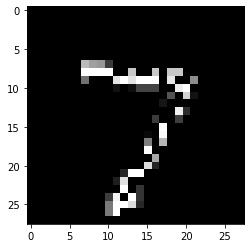

In [214]:
removed = remove_values(test_X[0], 40)
plt.imshow(removed, cmap="gray")

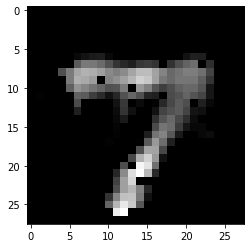

In [215]:
predict = Autoencoders.predict([removed.reshape(-1,28,28,1)])
img = predict[0]
img = img.reshape(28,28)
plt.imshow(img, cmap="gray")